<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Week 2 - Part2)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the dataset (Rain prediction data)

The dataset consists of various factors like temperature, humidity, a wind speed that are important in predicting the rainfall in the Indian subcontinent. 

**Temperature_min**: Minimum temperature for the day

**Temperature_max**: Maximum temperature for the day

**WindSpeedAt3am**: Today's speed of the wind at 3 am 

**WindSpeedAt10am**: Today's speed of the wind at 10 am

**WindSpeedAt6pm**: Today's speed of the wind at 6 pm 

**HumidityLevelAt10am**: Today's humidity level at 10 am

**HumidityAt6pm**: Today's humidity level at 6 pm

**PressureAt10am**: Today's atmospheric pressure at 10 am

**PressureAt6pm**: Today's atmospheric pressure at 6 pm

**TemperatureAt10am**: Today's temperature at 10 am

**TemperatureAt6pm**: Today's temperature at 6 pm

**WillRainTomorrow?**: Will there be rain tomorrow? (Yes or No) (target/dependent variable)

Use different dimension reduction techniques to transform the dataset into the lower dimension.

## Table of Content

1. **[Exploratory Data Analysis](#eda)**
2. **[Principal Component Analysis (PCA)](#pca)**


**Import the required libraries**

In [1]:
# write your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##PCA
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig

##PCA Model
from sklearn.decomposition import PCA

#Classification libraries 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier


#### Load the csv file

In [2]:
# write your code here
df_rain = pd.read_csv('/content/Ind_Climate_RainPred.csv')


In [3]:
df_rain.head()

,Temperature_min,Temperature_max,WindSpeedAt3am,WindSpeedAt10am,WindSpeedAt6pm,HumidityLevelAt10am,HumidityAt6pm,PressureAt10am,PressureAt6pm,TemperatureAt10am,TemperatureAt6pm,WillRainTomorrow?
0,20.3,30.7,32,6,17,110,72,1025.2,1015.4,26.6,40.4,No
1,30.0,33.3,33,10,20,70,35,1032.6,1035.4,26.6,39.3,No
2,23.5,26.9,24,14,20,98,63,1025.5,1026.0,29.8,34.6,Yes
3,25.5,26.9,45,20,30,82,59,1019.3,1016.9,24.2,30.8,No
4,33.5,39.3,33,4,12,94,49,1027.3,1022.2,33.6,43.6,No



### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Check the datatype of all the variables in the dataset. If the datatype is not as per the definition, do the needful.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# write your code here
df_rain.dtypes

Temperature_min        float64
Temperature_max        float64
WindSpeedAt3am           int64
WindSpeedAt10am          int64
WindSpeedAt6pm           int64
HumidityLevelAt10am      int64
HumidityAt6pm            int64
PressureAt10am         float64
PressureAt6pm          float64
TemperatureAt10am      float64
TemperatureAt6pm       float64
WillRainTomorrow?       object
dtype: object

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the statistical summary of all the numerical variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# write your code here
df_rain.describe()

,Temperature_min,Temperature_max,WindSpeedAt3am,WindSpeedAt10am,WindSpeedAt6pm,HumidityLevelAt10am,HumidityAt6pm,PressureAt10am,PressureAt6pm,TemperatureAt10am,TemperatureAt6pm
count,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000
mean,26.308964,30.309939,41.391820,15.379683,20.394209,82.210627,60.992928,1023.362481,1020.702332,30.713083,36.218626
std,6.843041,7.424327,14.437279,7.449217,7.847386,18.557838,22.737736,7.536385,7.433202,6.752840,7.723442
min,7.200000,13.200000,9.000000,2.000000,2.000000,11.000000,4.000000,993.700000,991.900000,10.300000,16.700000
25%,21.300000,24.600000,31.000000,10.000000,15.000000,70.000000,44.000000,1018.400000,1015.600000,25.800000,30.600000
50%,26.200000,29.500000,39.000000,14.000000,20.000000,85.000000,59.000000,1023.400000,1020.700000,30.800000,35.600000
75%,31.500000,35.600000,49.000000,20.000000,25.000000,98.000000,77.000000,1028.600000,1025.700000,35.400000,41.400000
max,47.300000,55.800000,131.000000,58.000000,63.000000,110.000000,110.000000,1048.900000,1046.400000,56.300000,63.300000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Is the target variable highly imbalanced? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# write your code here
df_rain['WillRainTomorrow?'].value_counts()

No     5464
Yes    5000
Name: WillRainTomorrow?, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Check if any missing values are present in the data. If yes, do the needful.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# write your code here
df_rain.isnull().sum()


Temperature_min        0
Temperature_max        0
WindSpeedAt3am         0
WindSpeedAt10am        0
WindSpeedAt6pm         0
HumidityLevelAt10am    0
HumidityAt6pm          0
PressureAt10am         0
PressureAt6pm          0
TemperatureAt10am      0
TemperatureAt6pm       0
WillRainTomorrow?      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of all the independent variables and identify the type of skewness.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

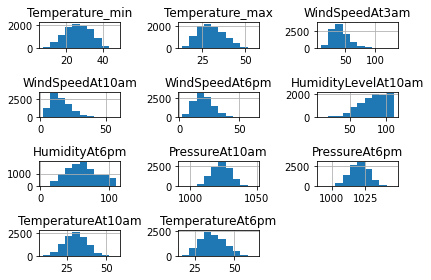

In [12]:
# write your code here
df_rain.hist()
plt.tight_layout()
plt.show()

#normal destribution - 
Neg Skewness - HumidityLevelat10am
Pos Skewness -Windspeedat10am, H6m, t6pm, tmax, ws3pm, ws6pm

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Transform the independent variables such that each variable will have a mean zero and standard deviation of 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# write your code here
std_scaler = StandardScaler()
scale_rain = std_scaler.fit_transform(df_rain.drop('WillRainTomorrow?', axis =1))

In [17]:
df_scaled_rain = pd.DataFrame(scale_rain, columns=df_rain.drop('WillRainTomorrow?', axis =1).columns)

In [18]:
round(df_scaled_rain.describe())

,Temperature_min,Temperature_max,WindSpeedAt3am,WindSpeedAt10am,WindSpeedAt6pm,HumidityLevelAt10am,HumidityAt6pm,PressureAt10am,PressureAt6pm,TemperatureAt10am,TemperatureAt6pm
count,10464.0,10464.0,10464.0,10464.0,10464.0,10464.0,10464.0,10464.0,10464.0,10464.0,10464.0
mean,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-3.0,-2.0,-2.0,-2.0,-2.0,-4.0,-3.0,-4.0,-4.0,-3.0,-3.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,3.0,3.0,6.0,6.0,5.0,1.0,2.0,3.0,3.0,4.0,4.0


<a id="pca"> </a>
## 2. Principal Component Analysis (PCA)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Find the covariance matrix of the standardized data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# write your code here
cov_matrix = np.cov(df_scaled_rain.T)

In [20]:
cov_matrix[0:5]

array([[ 1.00009557,  0.62986804,  0.2774717 ,  0.19188583,  0.10114221,
        -0.25035675, -0.05795163, -0.3635111 , -0.34036162,  0.71612149,
         0.54811355],
       [ 0.62986804,  1.00009557,  0.23626203, -0.01431146,  0.07161277,
        -0.50728072, -0.55772371, -0.24497184, -0.29854472,  0.76966307,
         0.8658169 ],
       [ 0.2774717 ,  0.23626203,  1.00009557,  0.42037333,  0.57176138,
        -0.27611053, -0.11724591, -0.47841125, -0.47563157,  0.27207988,
         0.17209019],
       [ 0.19188583, -0.01431146,  0.42037333,  1.00009557,  0.33458778,
        -0.31749763, -0.00663469, -0.25165481, -0.18433562,  0.14168084,
        -0.0391036 ],
       [ 0.10114221,  0.07161277,  0.57176138,  0.33458778,  1.00009557,
        -0.19684857, -0.15049059, -0.33940416, -0.30875067,  0.10542863,
         0.04909065]])

In [21]:
cov_matrix.shape

(11, 11)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Compute the eigenvalues and eigenvectors of the above covariance matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# write your code here
eigenvalue, eigenvector = np.linalg.eig(cov_matrix)



In [23]:
print(eigenvalue)

[4.37827342 2.20537611 1.4028951  0.93909121 0.69185977 0.38762838
 0.34242384 0.24329175 0.11262274 0.13748201 0.160107  ]


In [24]:
print(eigenvector)

[[ 0.33781785  0.03549082  0.35858565 -0.42444298  0.13644818  0.14320347
  -0.03924682  0.7102148   0.1131725  -0.11587593 -0.06766114]
 [ 0.40087506  0.28485778  0.10425574  0.03376955  0.1189962  -0.08118397
   0.15405941 -0.11028839 -0.82752819 -0.0604924   0.03216514]
 [ 0.26666777 -0.38120744 -0.1908883  -0.02705605  0.31592881 -0.78707893
  -0.12571969  0.05588588  0.05942134  0.04255307 -0.05314346]
 [ 0.14561644 -0.32320401 -0.33544556 -0.59156622 -0.38842204  0.06004674
   0.47855507 -0.14902074 -0.05799504 -0.04274979 -0.03114975]
 [ 0.17812567 -0.3671682  -0.34917199  0.09189247  0.61597616  0.55598391
  -0.01913024 -0.05338958 -0.03795733 -0.01323056  0.09857223]
 [-0.3093895  -0.14948994  0.44585592  0.03061406  0.38031984 -0.06731708
   0.58995926 -0.13531557  0.03534899 -0.07698165 -0.39936631]
 [-0.24976325 -0.30898812  0.45624609 -0.36844966  0.09207514 -0.01787154
  -0.23378475 -0.23506779 -0.17196895  0.16355004  0.56850478]
 [-0.27406409  0.40143674 -0.25274467 -0.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the Kaiser criterion to identify the optimal number of principal components.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# write your code here
list_eigenvalues = eigenvalue.tolist()
list_eigenvalues.sort(reverse =True)

In [31]:
print(list_eigenvalues)

[4.378273424761767, 2.2053761142853303, 1.402895095728115, 0.9390912080234725, 0.691859773871442, 0.38762837994450405, 0.34242383692492634, 0.24329174527626726, 0.16010699746005705, 0.1374820058100321, 0.11262274162621093]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. How many minimum principal components are required to explain at least 80% of the variation in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# write your code here
per_var = []
for i in list_eigenvalues:
  variation = i/sum(list_eigenvalues)*100
  per_var.append(variation)

per_var


[39.798681925287035,
 20.046957780587483,
 12.752372972792669,
 8.53637693698707,
 6.2890332343071496,
 3.5235575995268174,
 3.1126464812217693,
 2.211531771984975,
 1.4553790610444273,
 1.2497169749012775,
 1.0237452613593319]

First 4 principal components are explaining 81.11 % variation 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Create a dataframe of the transformed data with 4 principal components.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# write your code here
eig_vec_4 = eigenvector[:,0:4]
new_data = np.dot(df_scaled_rain, eig_vec_4)
df_pca =  pd.DataFrame(new_data, columns =['PC1','PC2','PC3','PC4'])

In [34]:
df_pca.head()

,PC1,PC2,PC3,PC4
0,-1.193577,0.344281,1.318532,1.383219
1,-0.417268,2.300435,-1.143463,-0.313206
2,-1.374390,0.522208,0.229444,-0.056650
3,-0.166105,-1.620767,-0.794714,0.358037
4,0.528825,2.208708,1.513146,0.370726


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Visualize the rain prediction data by transforming it to 2-dimensions using the python library. Also, display the classes of the target variables with different colors.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

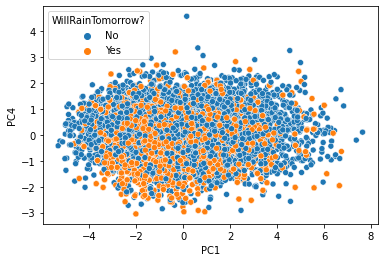

In [37]:
# write your code here
sns.scatterplot(x='PC1', y='PC4', data = df_pca, hue = df_rain['WillRainTomorrow?'])


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Split the dataset of the 11 standardized features into the train and test sets of proportion 70:30.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
# write your code here
y = df_rain['WillRainTomorrow?']
 

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaled_rain, y, test_size =0.3)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Reduce the number of features in the train and test sets to 3 using the python library.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
# write your code here
pca = PCA(n_components = 3, random_state = 10)

In [46]:
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

(10464, 3)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Write a generalized function that builds the random forest classification algorithm and returns the accuracy of the algorithm on the test set.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
# write your code here
def randomforest_model(X_train, X_test, y_train, y_test):
  rf_clf = RandomForestClassifier()
  rf_clf.fit(X_train, y_train)
  y_pred = rf_clf.predict(X_test)
  test_acc = accuracy_score(y_test, y_pred)
  print(test_acc)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a random forest model on the original data (without PCA transformation) and find the accuracy of the model on the test data. Also, calculate the time required to execute the code.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
# write your code here
%%time
randomforest_model(X_train, X_test, y_train, y_test)

0.9528662420382166
CPU times: user 1.96 s, sys: 3.45 ms, total: 1.96 s
Wall time: 2.54 s


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Build a random forest model on the dataset transformed using PCA and find the accuracy of the model on the test data. Also, calculate the time required to execute the code.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
# write your code here
%%time
randomforest_model(pca_train, pca_test, y_train, y_test)

0.9235668789808917
CPU times: user 1.48 s, sys: 3.64 ms, total: 1.49 s
Wall time: 2.16 s
